# Linear Threshold Model - Quickstart


A quick start to:

* running cascades
* running cascades over a range of connectivity values
* running cascades over a range of logic inputs and determining logic functions computed by the network

In [1]:
# import the LTM library and some utilities
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import linear_threshold_model as ltm
#help(ltm)

# A few examples

## Run a single LTM cascade

### setup the LTM model, set a seed node, and draw it

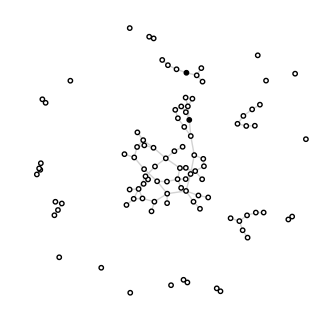

In [2]:
N = 100 # number of nodes

# connection probability
# p = 0.5 

# if you prefer instead mean degree z, use this:
z = 2
p = z / (N-1)

theta = 0 # fraction of antagonistic nodes.  0 = only 'excitatory' nodes

# whether the node thresholds are random (phi = None) uniform in [0,1], 
# or all some fixed value
phi_constant=None
# phi_constant = 0.1  #sets all thresholds to 0.1

# the state of the first few nodes in the network
# [1] will set node 0 to 'on'
# [1,1] will set nodes 0 and 1 to 'on'
seed_nodes = [1,1] 

# setup the LTM model
adjacency_matrix, node_states, phi_vector, node_types, degree_vector = \
ltm.setup_non_vectorized_ALTM(N, p, theta, phi_constant)

# perturb the network by setting some seed nodes
node_states = ltm.set_seed_nodes(N, seed_nodes)  # here we just set node zero to 'on'

# draw the network, while obtaining the networkx graph object and node positions
G, pos = ltm.draw_network(adjacency_matrix,node_states, with_labels = False, node_size=10)

### Run the cascade, obtaining the final node states

In [3]:
node_states = ltm.run_non_vectorized_ALTM_cascade(adjacency_matrix,
                                                  node_states,
                                                  phi_vector,
                                                  degree_vector,
                                                  node_types,
                                                  verbose=False)

### Draw the resulting network with node states

cascade size 0.06


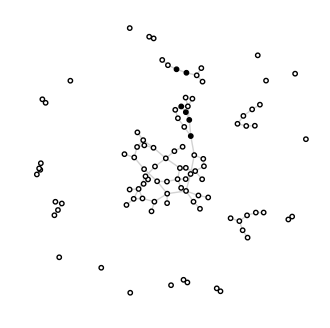

In [4]:
# draw the network, while obtaining the networkx graph object and node positions
# pass in the old pos to fix node positions
G, pos = ltm.draw_network(adjacency_matrix,node_states, position=pos, node_size = 10) 

# get the cascade size (fraction of network activated after the cascade has completed)
print('cascade size', ltm.cascade_size(node_states))

# plt.savefig('cascade.svg')
# plt.savefig('cascade.pdf')
# plt.savefig('cascade.png')

## Run multiple Monte Carlo cascade trials over a range of mean degree $z$ values
## plot the results

cascade sizes array (10, 80)


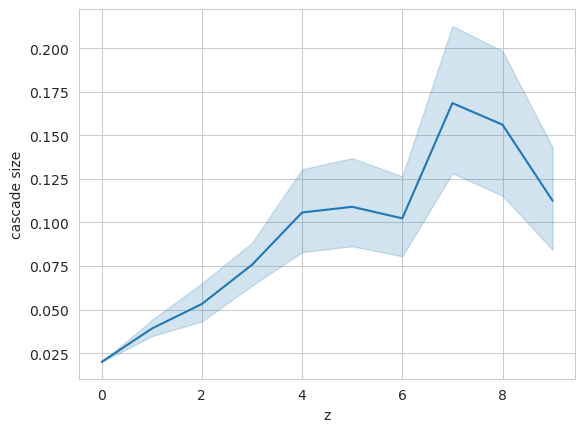

In [5]:
N = 100
k = 2
z_range = np.arange(0,10)
num_trials = 80
verbose = False

cascade_sizes = ltm.run_cascade_trials(N,num_trials,z_range,k)

# |z_range| x num_trials array of node activations 
print('cascade sizes array', cascade_sizes.shape)

# plot cascade sizes with confidence interval
ltm.plot_with_confidence_interval(cascade_sizes, z_range)

## Run a single logic trial:

Create the LTM network and freeze its edges and thresholds.

Run a cascade for each of the $2^k$ rows of the input truth table for $k$ inputs.

In [ ]:
# set LTM parameters
trial = 0
k = 2
inputs = ltm.build_inputs(k)
N = 10
p = 0.5

### the truth table for k inputs

In [23]:
truth_table, input_labels = ltm.build_truth_table(k)
truth_table

,a,b,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1
2,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1
3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


### the input values - we will run a cascade on the same network for each row

In [41]:
pd.DataFrame(inputs, columns=input_labels)

,a,b
0,0,0
1,0,1
2,1,0
3,1,1


In [12]:
# run the logic trial over the input rows
adj_matrix, phi_values, outputs, random_seed = ltm.run_logic_trial(trial, inputs, N, p)

In [35]:
# the activation values of each node for each input row
pd.DataFrame(outputs.T)

,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,True,False,False,True


### identify the Boolean functions computed by each node

In [32]:
node_Boolean_functions = ltm.identify_computed_functions(N, outputs.T)
node_Boolean_functions

array([3, 5, 0, 0, 0, 0, 1, 0, 0, 5])

### Determine the Decision Tree Complexity of each Boolean function computed

In [36]:
decision_tree_complexities = ltm.compute_decision_tree_complexities(node_Boolean_functions, k)
decision_tree_complexities

array([1, 1, 0, 0, 0, 0, 2, 0, 0, 1])

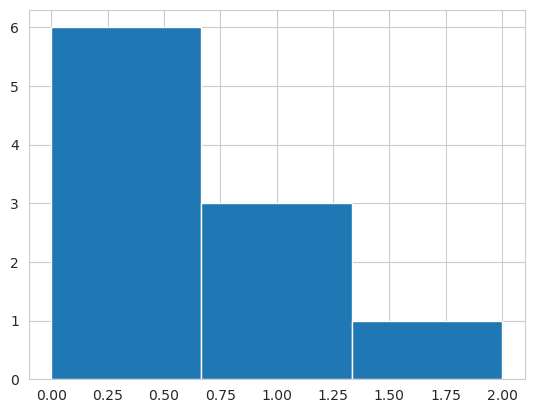

In [44]:
# plot the distribution of decision tree complexities computed
plt.hist(decision_tree_complexities, bins=3);